In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
def load_and_preprocess_data(dataset_path, img_size=(128, 128)):
    images = []
    labels = []

    for folder in os.listdir(dataset_path):
        label = 0 if folder == 'no' else 1  # Assigning label 0 to 'no' folder and 1 to 'yes' folder
        folder_path = os.path.join(dataset_path, folder)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            image = cv2.resize(image, img_size)
            image = image / 255.0  # Normalize pixel values to be between 0 and 1
            images.append(image)
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [3]:
# Load and preprocess the data
dataset_path = 'augmented data'
images, labels = load_and_preprocess_data(dataset_path)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# Define CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 neurons for binary classification

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train.reshape(-1, 128, 128, 1), y_train, epochs=30, batch_size=32, validation_data=(X_test.reshape(-1, 128, 128, 1), y_test))

Epoch 1/30
52/52 [==============================] - 18s 319ms/step - loss: 0.6021 - accuracy: 0.6881 - val_loss: 0.5603 - val_accuracy: 0.7312
Epoch 2/30
52/52 [==============================] - 15s 291ms/step - loss: 0.5089 - accuracy: 0.7535 - val_loss: 0.4978 - val_accuracy: 0.7603
Epoch 3/30
52/52 [==============================] - 16s 311ms/step - loss: 0.4323 - accuracy: 0.8189 - val_loss: 0.6164 - val_accuracy: 0.7312
Epoch 4/30
52/52 [==============================] - 15s 289ms/step - loss: 0.3725 - accuracy: 0.8401 - val_loss: 0.4931 - val_accuracy: 0.7869
Epoch 5/30
52/52 [==============================] - 16s 299ms/step - loss: 0.2831 - accuracy: 0.8776 - val_loss: 0.4927 - val_accuracy: 0.7918
Epoch 6/30
52/52 [==============================] - 15s 296ms/step - loss: 0.2217 - accuracy: 0.9128 - val_loss: 0.5838 - val_accuracy: 0.7724
Epoch 7/30
52/52 [==============================] - 19s 370ms/step - loss: 0.1544 - accuracy: 0.9370 - val_loss: 0.6923 - val_accuracy: 0.7458

In [9]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

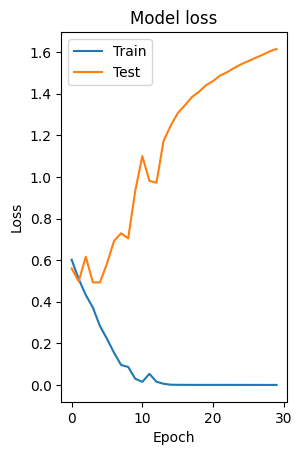

In [10]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

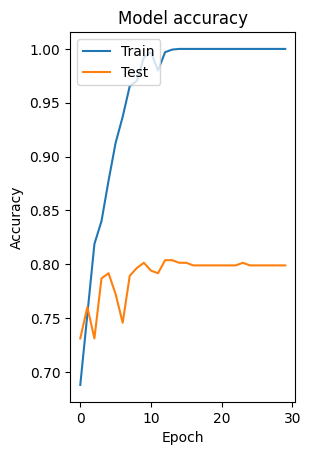

In [11]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [12]:
plt.show()

In [13]:
# Save the trained model
model.save('brain_tumor_detection_model.h5')

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Perform a single test using the saved model
# Load the model
saved_model = load_model('brain_tumor_detection_model.h5')

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(-1, 128, 128, 1), y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 1s 54ms/step - loss: 1.6154 - accuracy: 0.7990
Test Loss: 1.615444540977478
Test Accuracy: 0.7990314960479736


In [16]:
# Perform a single test
# Assume you have a single image named 'test_image.jpg'
test_image = cv2.imread(r'yes\Y163.JPG')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image, (128, 128))
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)
prediction = model.predict(test_image.reshape(-1, 128, 128, 1))
if prediction[0][0] > prediction[0][1]:
    print("Prediction: No Tumor")
else:
    print("Prediction: Tumor Present")

1/1 [==============================] - 0s 120ms/step
Prediction: Tumor Present
